In [ ]:
import requests
import time
import csv
from IPython.display import clear_output
from google.colab import drive

# Monter Google Drive
drive.mount('/content/drive')

# Chemin du fichier CSV sur Google Drive
CSV_FILE_NAME = "/content/drive/MyDrive/donnees_smart_home.csv"

# Configuration pour Open-Meteo
LATITUDE = 33.59  # Latitude de Casablanca
LONGITUDE = -7.62  # Longitude de Casablanca
BASE_URL = f"https://api.open-meteo.com/v1/forecast"
WEATHER_INTERVAL = 5  # Intervalle en secondes pour la mise à jour météo

# Seuils pour la température (en °C)
TEMP_CHAUFFAGE = 20  # Chauffage activé si température < 18°C
TEMP_CLIMATISATION = 24  # Climatisation activée si température > 26°C

# Fonction pour récupérer les données météorologiques
def obtenir_donnees_meteo():
    params = {
        "latitude": LATITUDE,
        "longitude": LONGITUDE,
        "current_weather": True,  # Obtenir les données météo actuelles
    }
    try:
        response = requests.get(BASE_URL, params=params)
        if response.status_code == 200:
            data = response.json()
            if "current_weather" in data:
                current_data = data["current_weather"]
                heure_observation = time.strftime("%H:%M:%S")  # Heure locale
                temperature = current_data.get('temperature', 'N/A')
                is_day = 'Jour' if current_data.get('is_day') else 'Nuit'

                # Prise de décision sur le chauffage et la climatisation
                systeme_temperature = gerer_temperature(temperature)

                # Simulation des rideaux
                systeme_rideaux = gerer_rideaux(is_day)

                # Sauvegarde des données dans un fichier CSV
                enregistrer_donnees_csv(
                    heure_observation, temperature, is_day, systeme_temperature, systeme_rideaux
                )

                # Affichage de la dernière mise à jour dans la console
                afficher_donnees_console()

            else:
                print("\nErreur dans les données :", data)
        else:
            print(f"\nErreur API : {response.status_code}")
    except Exception as e:
        print(f"\nErreur lors de la récupération des données météorologiques : {e}")

# Fonction pour enregistrer les données dans un fichier CSV
def enregistrer_donnees_csv(heure_observation, temperature, is_day, systeme_temperature, systeme_rideaux):
    try:
        # Si le fichier n'existe pas, on écrit l'en-tête
        fichier_existe = False
        try:
            with open(CSV_FILE_NAME, mode='r') as file:
                fichier_existe = True
        except FileNotFoundError:
            pass

        with open(CSV_FILE_NAME, mode='a', newline='') as file:
            writer = csv.writer(file)
            if not fichier_existe:
                writer.writerow([  # Écrire l'en-tête
                    "Heure d'observation", "Température (°C)", "Jour/Nuit", "Rideaux", "Chauffage/Climatisation"
                ])

            writer.writerow([  # Enregistrer les données
                heure_observation, temperature, is_day, systeme_rideaux, systeme_temperature
            ])
    except Exception as e:
        print(f"Erreur lors de l'enregistrement dans le fichier CSV : {e}")

# Fonction pour décider d'activer le chauffage ou la climatisation
def gerer_temperature(temperature):
    if temperature < TEMP_CHAUFFAGE:  # Température froide
        return "Chauffage"
    elif temperature > TEMP_CLIMATISATION:  # Température élevée
        return "Climatisation"
    else:
        return "Aucune action"

# Fonction pour décider d'ouvrir ou fermer les rideaux
def gerer_rideaux(jour_nuit):
    return "ouverts" if jour_nuit == 'Jour' else "fermés"

# Fonction pour afficher la dernière mise à jour dans la console
def afficher_donnees_console():
    # Effacer la sortie précédente dans la cellule de Colab
    clear_output(wait=True)

    try:
        with open(CSV_FILE_NAME, mode='r') as file:
            reader = csv.reader(file)
            lignes = list(reader)

            # Affichage de la dernière mise à jour
            print("\n\n🌟 [Météo] Mise à jour des données météorologiques 🌟\n")
            print("──────────────────────────────────────────────────────")
            print(f"🕰️ Heure d'observation : {lignes[-1][0]}")
            print(f"🌡️ Température : {lignes[-1][1]}°C")
            print(f"🌞 Jour/Nuit : {lignes[-1][2]}")
            print(f"🪟 Rideaux : {lignes[-1][3]}")
            print(f"❄️ Système : {lignes[-1][4]}")
            print("──────────────────────────────────────────────────────")

    except Exception as e:
        print(f"Erreur lors de la lecture du fichier CSV : {e}")

# Boucle principale
def main():
    print("### Démarrage du système ###\n")

    derniere_mise_a_jour_meteo = 0

    try:
        while True:
            temps_actuel = time.time()

            # Mise à jour des données météorologiques
            if temps_actuel - derniere_mise_a_jour_meteo >= WEATHER_INTERVAL:
                obtenir_donnees_meteo()
                derniere_mise_a_jour_meteo = temps_actuel

            time.sleep(1)
    except KeyboardInterrupt:
        print("\n### Arrêt du système ###")

# Lancer le programme
if __name__ == "__main__":
    main()




🌟 [Météo] Mise à jour des données météorologiques 🌟

──────────────────────────────────────────────────────
🕰️ Heure d'observation : 19:07:52
🌡️ Température : 17.0°C
🌞 Jour/Nuit : Nuit
🪟 Rideaux : fermés
❄️ Système : Chauffage
──────────────────────────────────────────────────────

### Arrêt du système ###


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Pour l'ID le voici : "Raphael"
# Pour le mot de passe le voici : "Raphael@1234"
# Pour l'authentification afin de visualiser les graphique
# Pour passer à cette étape il faut arreter d'abord l'execution de la premiere de la premiere partie du code pour que la base de données soit operationnelle enfin qu'on visualise les données

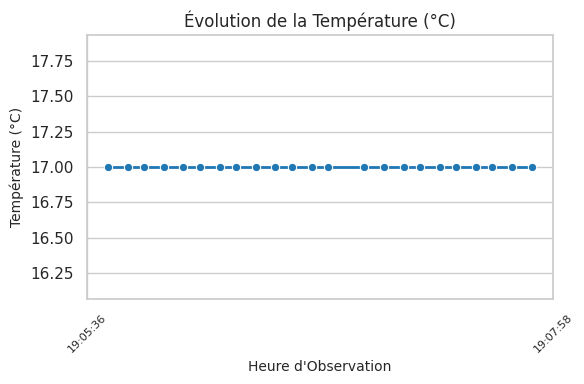

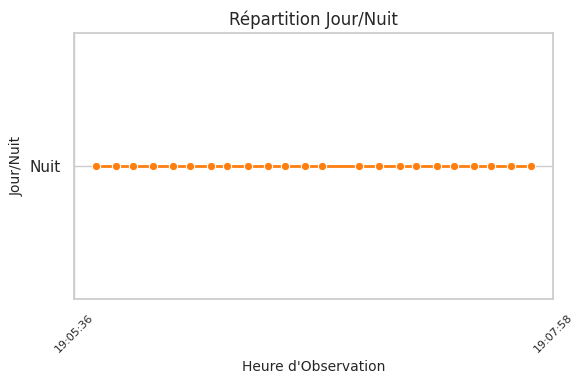

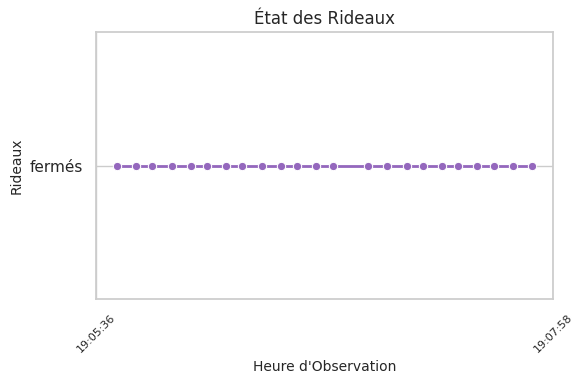

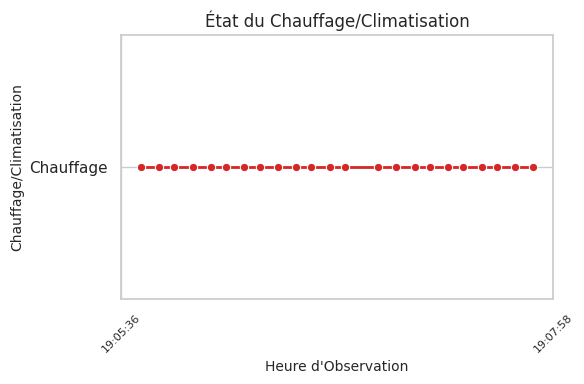

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Fonction d'authentification avec ipywidgets
def authentification():
    # Création des éléments d'interface
    title = widgets.HTML(value="<h2>Authentification</h2>")
    id_label = widgets.Label("ID :")
    id_text = widgets.Text(placeholder="Entrez votre ID", layout=widgets.Layout(width='300px'))
    mdp_label = widgets.Label("Mot de passe :")
    mdp_text = widgets.Password(placeholder="Entrez votre mot de passe", layout=widgets.Layout(width='300px'))

    # Bouton de validation
    login_button = widgets.Button(description="Se connecter", layout=widgets.Layout(width='150px', height='40px'))

    # Affichage des widgets
    display(title, id_label, id_text, mdp_label, mdp_text, login_button)

    # Fonction pour valider l'authentification
    def valider_authentification(b):
        id_utilisateur = id_text.value
        mot_de_passe = mdp_text.value

        # Identifiants corrects
        id_correct = "Raphael"
        mdp_correct = "Raphael@1234"

        # Vérification des informations
        if id_utilisateur == id_correct and mot_de_passe == mdp_correct:
            clear_output()  # Effacer l'interface d'authentification
            afficher_graphique()  # Passer aux graphiques
        else:
            print("ID ou mot de passe incorrect!")

    # Lier le bouton à la fonction
    login_button.on_click(valider_authentification)


# Fonction pour charger et afficher les graphiques
def afficher_graphique():
    # Charger les données CSV
    df = pd.read_csv("/content/drive/MyDrive/donnees_smart_home.csv")

    # Mettre à jour le style pour rendre les graphiques plus esthétiques
    sns.set(style="whitegrid")

    # Assurez-vous que la colonne "Heure d'observation" est bien en format datetime
    df['Heure d\'observation'] = pd.to_datetime(df['Heure d\'observation'], format='%H:%M:%S')

    # 1. Graphique pour la Température (°C)
    plt.figure(figsize=(6, 4))
    sns.lineplot(data=df, x="Heure d'observation", y="Température (°C)", marker='o', color='tab:blue', linewidth=2)

    # Formater l'axe des abscisses
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))  # Format des heures
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Intervalles réguliers

    plt.title("Évolution de la Température (°C)", fontsize=12)
    plt.xlabel("Heure d'Observation", fontsize=10)
    plt.ylabel("Température (°C)", fontsize=10)
    plt.xticks(rotation=45, fontsize=8)
    plt.tight_layout()
    plt.show()


    # 2. Graphique pour "Jour/Nuit" avec l'heure en x et jour/nuit en y
    plt.figure(figsize=(6, 4))  # Taille réduite
    sns.lineplot(data=df, x="Heure d'observation", y="Jour/Nuit", marker='o', color='tab:orange', linewidth=2)

    # Formater l'axe des abscisses
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))  # Format des heures
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Intervalles réguliers


    plt.title("Répartition Jour/Nuit", fontsize=12)
    plt.xlabel("Heure d'Observation", fontsize=10)
    plt.ylabel("Jour/Nuit", fontsize=10)
    plt.xticks(rotation=45, fontsize=8)  # Réduire la taille de la police des heures
    plt.tight_layout()
    plt.show()

    # 3. Graphique pour "Rideaux" avec l'heure en x et état des rideaux en y
    plt.figure(figsize=(6, 4))  # Taille réduite
    sns.lineplot(data=df, x="Heure d'observation", y="Rideaux", marker='o', color='tab:purple', linewidth=2)

    # Formater l'axe des abscisses
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))  # Format des heures
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Intervalles réguliers


    plt.title("État des Rideaux", fontsize=12)
    plt.xlabel("Heure d'Observation", fontsize=10)
    plt.ylabel("Rideaux", fontsize=10)
    plt.xticks(rotation=45, fontsize=8)  # Réduire la taille de la police des heures
    plt.tight_layout()
    plt.show()

    # 4. Graphique pour "Chauffage/Climatisation" avec l'heure en x et statut chauffage/climatisation en y
    plt.figure(figsize=(6, 4))  # Taille réduite
    sns.lineplot(data=df, x="Heure d'observation", y="Chauffage/Climatisation", marker='o', color='tab:red', linewidth=2)


    # Formater l'axe des abscisses
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))  # Format des heures
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Intervalles réguliers

    plt.title("État du Chauffage/Climatisation", fontsize=12)
    plt.xlabel("Heure d'Observation", fontsize=10)
    plt.ylabel("Chauffage/Climatisation", fontsize=10)
    plt.xticks(rotation=45, fontsize=8)  # Réduire la taille de la police des heures
    plt.tight_layout()
    plt.show()


# Lancer l'application avec ipywidgets
authentification()


# Merci pour votre attention Mr